<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_%ED%95%99%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리에서 그래프의 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/entrance/'
df = pd.read_excel(f'{path}susi_gj2025_memo_jeonghap_small.xlsx')


# 첫 5줄을 봅니다.
df.tail(2)

,대학,전형분류,전형명,모집인원,경쟁률,전형방법,수능최저,수능최저등급,최저세부,label1
28,한양대,종합,추천형,156,16,학생부100,있음,2.3,NaN,한양대 종합 추천형 156명/학생부100% 최저여부:있음/수능최저:2.3등급-nan...
29,홍익대,종합,학교생활우수자,467,16,서류100,있음,2.7,NaN,홍익대 종합 학교생활우수자 467명/서류100% 최저여부:있음/수능최저:2.7등급-...


In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

변수별 결측값수: 모집인원         0
경쟁률          0
단계형전형여부      0
수능최저여부코드     0
일차서류배수      14
이차면접비율      14
dtype: int64

변수별 무한대값: 모집인원        0
경쟁률         0
단계형전형여부     0
수능최저여부코드    0
일차서류배수      0
이차면접비율      0
dtype: int64



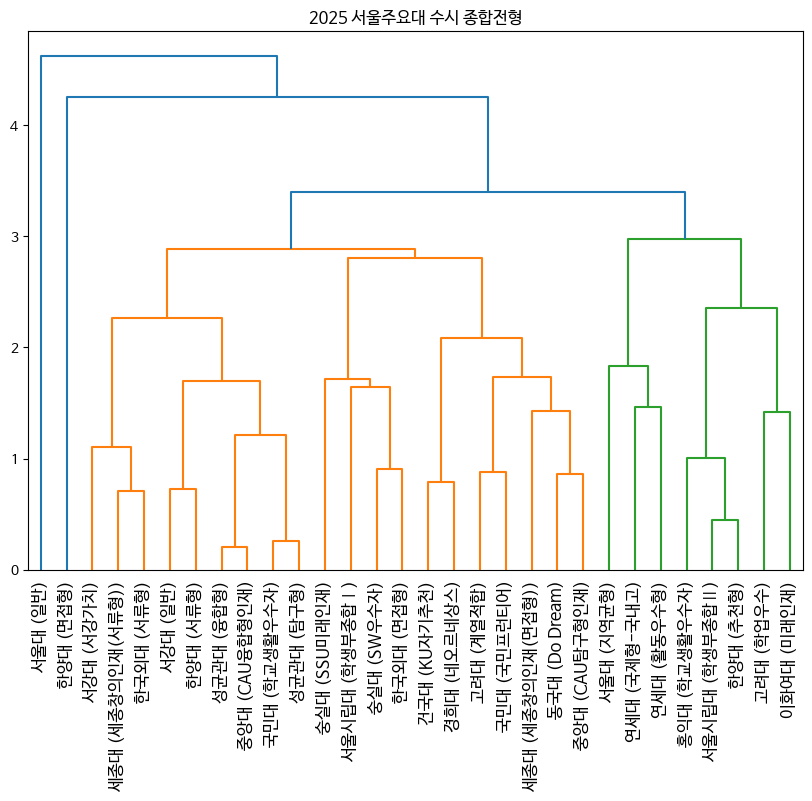

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
import re



##  데이터 부르기
path = '/content/drive/MyDrive/python/entrance/'
hj_clus = pd.read_excel(f'{path}susi_gj2025_memo_jeonghap_small.xlsx')


# 조건에 맞게 열 추가 및 처리
hj_clus['단계형전형여부'] = hj_clus['전형방법'].apply(lambda x: 1 if "2단계" in x else 0)
hj_clus['수능최저여부코드'] = hj_clus['수능최저'].apply(lambda x: 0 if x == "없음" else 1)
hj_clus['일차서류배수'] = hj_clus['전형방법'].apply(lambda x: float(re.search(r"(\d+(\.\d+)?)(?=배수)", x).group(0)) if re.search(r"(\d+(\.\d+)?)(?=배수)", x) else np.nan)
hj_clus['이차면접비율'] = hj_clus['전형방법'].apply(lambda x: float(re.search(r"(?<=면접)\d+", x).group(0)) if re.search(r"(?<=면접)\d+", x) else np.nan)


# '대학', '전형명' 열의 값을 조건에 따라 합치기
hj_clus['대학전형명'] = hj_clus['대학'] + " (" + hj_clus['전형명'] + ")"


# 데이터 표준화 및 필요한 열만 선택
features = ['모집인원', '경쟁률', '단계형전형여부', '수능최저여부코드', '일차서류배수', '이차면접비율']
hj_clus[features] = scale(hj_clus[features])


# 열의 내용을 행 이름으로 설정 후 필요한 열만 남기기
hj_clus_n = hj_clus.set_index('대학전형명')[features]

hj_clus_n_unavailable = hj_clus_n.isna().sum()


# 결측값 확인
print(f'변수별 결측값수: {hj_clus_n_unavailable}')



undefinite = np.isinf(hj_clus_n).sum()

# 무한대 값 확인
print(f"변수별 무한대값: {undefinite}")



# 결측값을 각 열의 평균으로 대체
hj_clus_n.fillna(hj_clus_n.mean(), inplace=True)


# 무한대 값을 각 열의 최대값으로 대체
hj_clus_n.replace([np.inf, -np.inf], np.nan, inplace=True)
hj_clus_n.fillna(hj_clus_n.max(), inplace=True)



# 유클리드 거리로 계산
d = linkage(hj_clus_n, method='average', metric='euclidean')


# 그래프 그리기 (제목 수정 및 레이블 글자 크기 조절, 눈금자 삭제)
plt.figure(figsize=(10, 7))
dendrogram(d, labels=hj_clus_n.index, leaf_rotation=90, leaf_font_size=12)
plt.title("2025 서울주요대 수시 종합전형")
plt.xlabel('')
plt.ylabel('')
plt.show()

클러스터 수 2, 실루엣 점수 0.3268879126272026
클러스터 수 3, 실루엣 점수 0.22876063116773357
클러스터 수 4, 실루엣 점수 0.21729516652217873
클러스터 수 5, 실루엣 점수 0.20588813136982004
클러스터 수 6, 실루엣 점수 0.2821246199700891
클러스터 수 7, 실루엣 점수 0.3405455076323589
클러스터 수 8, 실루엣 점수 0.35435480151239745
클러스터 수 9, 실루엣 점수 0.37950523727454133
클러스터 수 10, 실루엣 점수 0.387921043639059


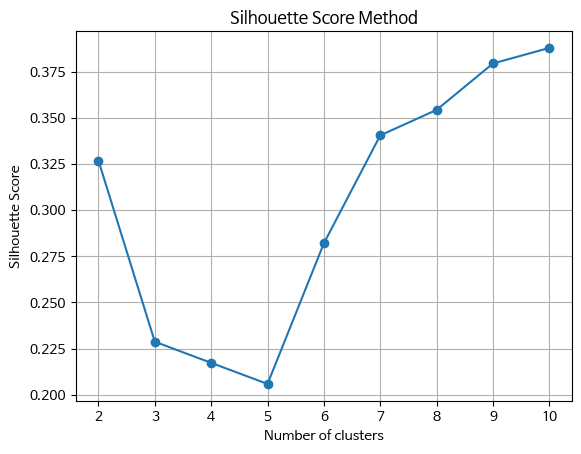

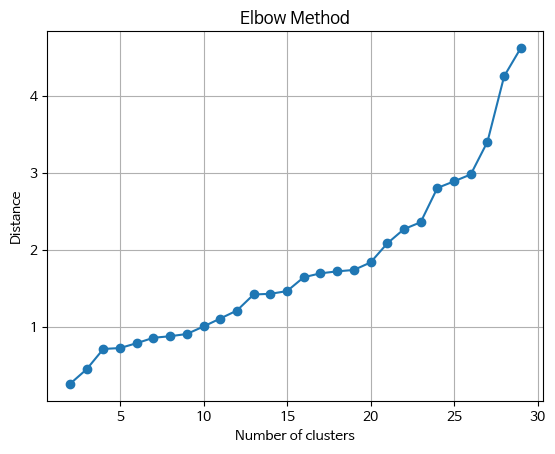

In [10]:
#최적의 군집수 확인

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# 실루엣 점수를 저장할 리스트
silhouette_scores = []

# 클러스터 수를 2부터 10까지 시도
for n_clusters in range(2, 11):
    # 군집 레이블 생성
    labels = fcluster(d, n_clusters, criterion='maxclust')
    # 실루엣 점수 계산
    score = silhouette_score(hj_clus_n, labels, metric='euclidean')
    silhouette_scores.append(score)
    print(f"클러스터 수 {n_clusters}, 실루엣 점수 {score}")

# 실루엣 점수를 그래프로 표현
plt.figure()
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 엘보우 방법 적용 (거리의 변화율 확인)
distances = [linkage(hj_clus_n, method='average', metric='euclidean')[i, 2] for i in range(1, len(d))]
plt.figure()
plt.plot(range(2, len(distances)+2), distances, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [4]:
df.columns

Index(['대학', '전형분류', '전형명', '모집인원', '경쟁률', '전형방법', '수능최저', '수능최저등급', '최저세부',
       'label1'],
      dtype='object')